<a href="https://colab.research.google.com/github/tkd8973/MachineLearning_SW/blob/main/tkd8973/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/code?datasetId=483&sortBy=voteCount
file_url = 'https://github.com/BigData23th/Data/raw/main/spam.csv'
# df = pd.read_csv(file_url) # 업로드 된 외부의 URL을 넣었을 경우에 해당 CSV를 다운 받아서 읽어줌
df = pd.read_csv(file_url, index_col=0) # 0번째의 열을 인덱스로 취급
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.info() # 결측치 X, 모든 열들이 object(문자열)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5574 non-null   object
 1   text    5574 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [5]:
df.describe() # include = 'O', 'object', 'all' ... => int, float형 X => object가 기본으로 나온 것
# unique : series.nunique() -> 고윳값 개수
# top : 가장 많이 나온 것 / freq (frequency) : 빈도(자주 나오는지)

,target,text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [6]:
# df.target.value_counts().plot(kind='bar')


In [8]:
# 지도 학습 -> 독립변수/피처(X) - 종속변수/라벨(y)
# 종속변수의 분포가 항상 일정하지는 않음 (1이 너무 많거나, 0이 너무 많거나...)
# 한쪽에 데이터가 편중
(df.target.value_counts())/len(df)

ham     0.865985
spam    0.134015
Name: target, dtype: float64

# 전처리

In [9]:
# 나이브 베이즈 -> 서로 독립된 여러 범주형 변수들로 데이터들을 분류
# => 자연어 처리 => 특정한 단어가 존재하느냐 존재하지 않느냐... => 벡터화 (배열화)
# (0, 121) 1 ... -> 벡터
# 단어들의 등장 여부들을 판단해서 => 해당 문장이(메시지가) 스팸인지 판단하는 알고리즘
# 문장들을 -> 단어의 묶음으로 변환 -> 단어 등장에 따른 배열로 변환
df.text[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [10]:
# 1. 특수문자들이 붙으면 다른 단어로 인식할 수 있음 (특수문자 제거)
# 2. 대소문자 차이 => 소문자 통일 
# 3. 불용어 -> 별로 큰 의미 값을 지니지는 않는데 자리만 차지
df.text[0].split(' ')

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [11]:
# 특수문자를 제거
from string import punctuation
# import string
# string.punctuation
punctuation # 파이썬 내의 일반적인 특수 기호들 모음

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
first_text = df.text[0]
first_text

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [ ]:
# 모든 string(파이썬 내부에서의 문자 타입)은 리스트 취급
# 리스트 취급 -> for 문에 in 자리에 넣을 수 있다
for c in first_text:
    print(c) # 글자 하나하나씩 표시

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [ ]:
# text에 for를 통해서 한 글자씩 조회할 건데
# 그 한 글자가 punctuation하는 문자 묶음에 소속되어 있지 (포함되어 있지) 않으면 표시해주세요

In [13]:
for c in first_text:
    if not c in punctuation:
        print(c)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [14]:
new_text =''
for c in first_text:
    if not c in punctuation:
        new_text+=c

In [17]:
# 리스트 컴프리헨션으로 축약한 버전
new_text = "".join([c for c in first_text if not c in punctuation])
new_text

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [19]:
# 함수의 패러미터 (:) -> 타입 힌트, ) -> 타입힌트 
def remove_punctuation(old_text: str) -> str:
    new_text = '' # 특수문자가 모두 제거된 텍스트
    for c in old_text: # 이전 텍스트를 모두 반복해서 조회해서
        if c not in punctuation: # 특수문자가 아닌 조건을 만족시키는 문자에 한해서
            # print(c)
            # new_text.append(c)
            new_text += c # 새로운 텍스트에 추가
    return new_text # 새로운 텍스트를 반환

In [20]:
# 특수문자 처리
remove_punctuation(first_text)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [22]:
# 열 자체를 함수에다 넣어버리면 -> 통으로 처리되어서 나옴
# pandas에서 '행' 단위로 반복적으로 데이터를 처리해주는 건 -> apply
df['text'].apply(remove_punctuation)

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [ ]:
# df?s? .apply(익명함수, 함수명) => 행들에 반복적으로 적용
# remove_punctuation -> old_text (패러미터 1개짜리) / 행, 하나의 데이터 (패러미터 1개짜리)
# df.text.apply(lambda row : remove_punctuation(row))
# remove_punctuation이 행마다 적용된 시리즈

0       Go until jurong point crazy Available only in ...
1                                 Ok lar Joking wif u oni
2       Free entry in 2 a wkly comp to win FA Cup fina...
3             U dun say so early hor U c already then say
4       Nah I dont think he goes to usf he lives aroun...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                  Will ü b going to esplanade fr home
5571    Pity  was in mood for that Soany other suggest...
5572    The guy did some bitching but I acted like id ...
5573                            Rofl Its true to its name
Name: text, Length: 5574, dtype: object

In [24]:
# 특수문자를 제거한 text 열을 원본 text에 덮어씌우기
df2 = df.copy()
df.text = df.text.apply(remove_punctuation)
df

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home
5571,ham,Pity was in mood for that Soany other suggest...
5572,ham,The guy did some bitching but I acted like id ...


In [26]:
# 대소문자 통일, 불용어 처리
import nltk

In [27]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
from nltk.corpus import stopwords # nltk -> 다운로드 -> 불러옴

In [ ]:
stopwords.words('english') # 의미 없으면서 자리 차지하는 불용어

In [ ]:
# 특수문자가 사라진 상태
# 소문자로 통일해주고 -> 불용어를 제거

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [33]:
# default : 스페이스(여백)를 기준으로 문장을 쪼개줌
# split(쪼개주는 기준) -> 예) split(';') 
first_text.split(',')

['Go until jurong point',
 ' crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...']

In [35]:
# 영어 불용어 뭉치
stop_eng = stopwords.words('english')
stop_eng

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [38]:
# 여백(디폴트, 스페이스) 기준 쪼개줌
# 모든 문자들을 소문자화 (<=> upper: 대문자화)
# 불용어
for word in first_text.split():
    print(word.lower())

go
until
jurong
point,
crazy..
available
only
in
bugis
n
great
world
la
e
buffet...
cine
there
got
amore
wat...


In [41]:
# "sepertator".join(...) => 구분자
# "".join(...) => 구분자로 X
# " ".join(...) => 구분자로 여백(스페이스)
# 불용어는 다 제거하고, 소문자화된 새로운 텍스트
new_text = []
for word in first_text.split():
    l_word = word.lower() # 모든 문자들을 소문자화 (<=> upper: 대문자화)
    # if l_word in stop_english: # 불용어
    if l_word not in stop_eng: # 불용어
        # print(l_word)
        new_text.append(l_word)
''.join(new_text)

'gojurongpoint,crazy..availablebugisngreatworldlaebuffet...cinegotamorewat...'

In [45]:
def remove_stop_words(text):
    new_text = []
    for word in text.split():
        l_word = word.lower() # 모든 문자들을 소문자화 (<=> upper: 대문자화)
        # if l_word in stop_english: # 불용어
        if l_word not in stop_eng: # 불용어
            # print(l_word)
            new_text.append(l_word)
    return " ".join(new_text) # 불용어는 다 제거하고, 소문자화된 새로운 텍스트

In [46]:
df.text.apply(remove_stop_words)

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

In [ ]:
df2.text

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will ü b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object

In [ ]:
# 소문자화 하고 + 불용어 제거하는 함수를 모든 행에 적용


0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

In [ ]:
# 종속변수 처리
# 범주형 변수

ham     4827
spam     747
Name: target, dtype: int64

In [ ]:
# pd.get_dummies(df, columns=['target'], drop_first=True)


0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

In [ ]:
# 텍스트를 카운트(빈도수) 기반으로 벡터화
# 특수문자 제거된 상태에서, 불용어도 제거, 소문자화

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u £750 pound prize ...
5570                          ü b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

In [47]:
# 독립변수들 X: 2개 이상의 열로 구성된 데이터프레임 (대문자) - df
# 종속변수 y: 1개로 구성된 시리즈 (소문자) - series
# 독립변수, 피쳐 # 열 1라서 x라고 표시했는데 거슬리면? X로 해도 문제 없음
# 종속변수, 타깃

x = df.text
y = df.target

In [49]:
# 빈도수(카운트)를 기반으로 벡터화
from sklearn.feature_extraction.text import CountVectorizer

In [53]:
# model, scaler... 클래스 생성자 -> 객체를 만들어서 -> 학습 -> 사용
# model -> fit(X, y) -> predict...
# 전처리 관련 -> fit(X) -> transform...
cv = CountVectorizer()
cv.fit(x)

CountVectorizer()

In [54]:
cv.vocabulary_

{'go': 3822,
 'until': 8779,
 'jurong': 4734,
 'point': 6501,
 'crazy': 2518,
 'available': 1427,
 'only': 6094,
 'in': 4444,
 'bugis': 1901,
 'great': 3919,
 'world': 9288,
 'la': 4895,
 'buffet': 1899,
 'cine': 2235,
 'there': 8352,
 'got': 3879,
 'amore': 1188,
 'wat': 9040,
 'ok': 6054,
 'lar': 4934,
 'joking': 4702,
 'wif': 9180,
 'oni': 6088,
 'free': 3606,
 'entry': 3188,
 'wkly': 9239,
 'comp': 2351,
 'to': 8477,
 'win': 9195,
 'fa': 3324,
 'cup': 2574,
 'final': 3450,
 'tkts': 8466,
 '21st': 454,
 'may': 5384,
 '2005': 441,
 'text': 8291,
 '87121': 875,
 'receive': 6901,
 'questionstd': 6792,
 'txt': 8680,
 'ratetcs': 6844,
 'apply': 1277,
 '08452810075over18s': 71,
 'dun': 3037,
 'say': 7261,
 'so': 7682,
 'early': 3059,
 'hor': 4263,
 'already': 1160,
 'then': 8346,
 'nah': 5736,
 'dont': 2943,
 'think': 8374,
 'he': 4077,
 'goes': 3836,
 'usf': 8832,
 'lives': 5098,
 'around': 1329,
 'here': 4137,
 'though': 8395,
 'freemsg': 3614,
 'hey': 4156,
 'darling': 2638,
 'its': 46

In [56]:
len(cv.vocabulary_)

9544

In [58]:
x = cv.transform(x)

AttributeError: ignored

In [60]:
# x번째 문장에 y번째 단어가 z개 있다
# (x, y) z
print(x)

  (0, 1188)	1
  (0, 1427)	1
  (0, 1899)	1
  (0, 1901)	1
  (0, 2235)	1
  (0, 2518)	1
  (0, 3822)	1
  (0, 3879)	1
  (0, 3919)	1
  (0, 4444)	1
  (0, 4734)	1
  (0, 4895)	1
  (0, 6094)	1
  (0, 6501)	1
  (0, 8352)	1
  (0, 8779)	1
  (0, 9040)	1
  (0, 9288)	1
  (1, 4702)	1
  (1, 4934)	1
  (1, 6054)	1
  (1, 6088)	1
  (1, 9180)	1
  (2, 71)	1
  (2, 441)	1
  :	:
  (5572, 1937)	1
  (5572, 2814)	1
  (5572, 3131)	1
  (5572, 3555)	1
  (5572, 3606)	1
  (5572, 3732)	1
  (5572, 3981)	1
  (5572, 4077)	1
  (5572, 4385)	1
  (5572, 4444)	1
  (5572, 4524)	1
  (5572, 4585)	1
  (5572, 5048)	1
  (5572, 5831)	1
  (5572, 7698)	1
  (5572, 7709)	1
  (5572, 8329)	1
  (5572, 8477)	1
  (5572, 8822)	1
  (5572, 9090)	1
  (5573, 4606)	2
  (5573, 5742)	1
  (5573, 7120)	1
  (5573, 8477)	1
  (5573, 8626)	1


In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21,stratify=y)

In [66]:
y_train

3458    ham
3693    ham
4503    ham
5346    ham
1346    ham
       ... 
3785    ham
4619    ham
4309    ham
1905    ham
3193    ham
Name: target, Length: 4459, dtype: object

In [74]:
def preprocessing(text):
    #1. 특수문자 제거
    new_text = '' # 특수문자가 모두 제거된 텍스트
    for c in text: # 이전 텍스트를 모두 반복해서 조회해서
        if c not in punctuation: # 특수문자가 아닌 조건을 만족시키는 문자에 한해서
            # print(c)
            # new_text.append(c)
            new_text += c # 새로운 텍스트에 추가
    #2. 소문자화, 불용어 제거
    new_text2 = []
    for word in new_text.split():
        l_word = word.lower() # 모든 문자들을 소문자화 (<=> upper: 대문자화)
        # if l_word in stop_english: # 불용어
        if l_word not in stop_eng: # 불용어
            # print(l_word)
            new_text2.append(l_word)
    return " ".join(new_text2)

# 모델링

In [68]:
# 나이브 베이즈 모델
from sklearn.naive_bayes import MultinomialNB

In [69]:
model = MultinomialNB()
model.fit(x_train,y_train)
pre = model.predict(x_test)
pre

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [70]:
model.predict_proba(x_test)

array([[9.98813344e-01, 1.18665588e-03],
       [9.99057199e-01, 9.42800783e-04],
       [9.99999833e-01, 1.66692087e-07],
       ...,
       [9.99999990e-01, 9.86447814e-09],
       [9.94541566e-01, 5.45843355e-03],
       [9.99975234e-01, 2.47655172e-05]])

In [76]:
text = 'free free time'
model.predict(cv.transform([preprocessing(text)]))

array(['spam'], dtype='<U4')

스팸입니다


In [ ]:
pred

array([1])

In [ ]:
# accuracy_score : 시험셋의 실제 정답값(라벨) / 예측값의 일치 정도를 보는 값
# 일치도 -> 2~3% 틀린게. 얼마만큼, 어떤 방향으로 틀렸는지
# spam -> spam (정답)
# ham -> ham (정답)
# ------------
# spam -> ham (오답) -> 놓치는 것
# ham -> spam (오답) -> 잘못 잡은 것

0.97847533632287

In [ ]:
# 혼동 행렬
from sklearn.metrics import confusion_matrix # 정답, 오답이 있으면 그것들이 어떻게 구성되었는지

In [ ]:
# 가로 -> 예측값
# 세로 -> 실제값
confusion_matrix(y_test, pred)

array([[947,  19],
       [  5, 144]])

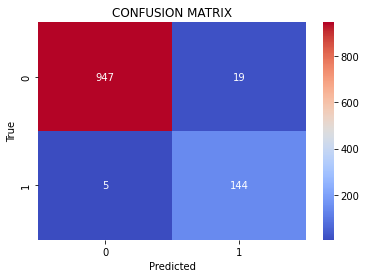

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), cmap='coolwarm', annot=True, fmt='.0f')
plt.title("CONFUSION MATRIX")
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

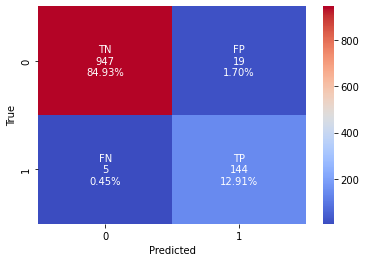

In [ ]:
cf_matrix = confusion_matrix(y_test,pred)
cf_matrix
group_names = ['TN','FP','FN','TP']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='coolwarm')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.show()

In [ ]:
!pip install mlxtend --quiet

import joblib
joblib.dump(model, 'model.pkl')
joblib.dump(cv, 'cv.pkl')